# Image Data Augmentation
- 원본 이미지에 적절한 변형을 가해서 새로운 데이터를 만들어 내는 방식
- 즉, 원본 이미지를 상하좌우 방향으로 조금 이동하거나, 약간 회전 또는 기울이거나 또는 확대 등의 여러가지 변환을 조합해 이미지 데이터 개수를 증가시킴

## Image Data Augmentation 장점
- 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어주기 때문에 실제 데이터를 가지고 테스트 시에 더 높은 성능을 기대할 수 있음.
- CNN모델을 학습시키기에 수집된 데이터가 적은 경우에 강력한 힘을 발휘함

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1. ImageDataGenerator 생성

In [2]:
gen = ImageDataGenerator(rotation_range = 30,
                         width_shift_range=0.3,
                         shear_range=0.4,
                         horizontal_flip=True)
# 30도 이내에서 회전, 가로방향 30% 범위에서 이동, 이미지 기울임은 40% 범위에서 기울임.
# 색상의 최대값 255로 나누어 줌으로서 0~1 값으로 정규화 시행
# 좌우반전 가능한 변화

## 2. 이미지 로드 및 정규화

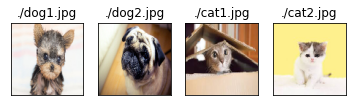

In [4]:
img_array_list = []
img_names = [ './dog1.jpg', './dog2.jpg', './cat1.jpg', './cat2.jpg' ]

for i in range(len(img_names)):

    loaded_img = load_img(img_names[i], target_size=(100,100))
                # JpegImageFile 타입 리턴
    
    loaded_img_array = img_to_array(loaded_img) / 255.0
    # load_img() 함수는 리턴 타입이 JpeglmageFile이므로 이미지를
    # img_to_array() 이용하여 numpy 타입으로 변환
    img_array_list.append(loaded_img_array)


plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):

    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

## 3. Flow() 함수 적용

In [5]:
batch_siz = 2

data_gen = gen.flow(np.array(img_array_list), batch_size=batch_siz)
# flow() 함수에 입력으로 주어지는 원본 데이터 형상(shape)
# = (원본 데이터 전체 개수, 높이, 너비, 채널) 형상을 가지는 4차원 텐서로 주어져야 함.

# ex) (100,100,2)형상을 가지는 원본 데이터가 5개 있으면
# (5,100,100,2) 4차원 텐서로 변환해줘야 flow() 함수 사용 가능함.

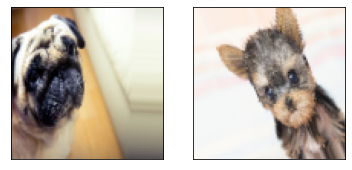

In [6]:
img = data_gen.next()
# next() 함수 실행할때마다 flow() 함수 또는 flow_from_directory() 함수에서
# 지정한 batch_size 만큼의 변형된 데이터(img)와 정답(label)이 리턴됨.
# batch_siz = 2 지정된 개수만큼 이미지 생성


plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

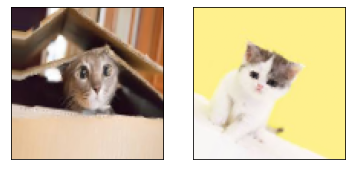

In [7]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

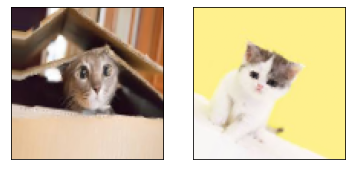

In [8]:
mg = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

# Directory에서 이미지를 불러와서 실행

## 1. ImageDataGenerator 실행

In [9]:
gen = ImageDataGenerator(rotation_range = 30,
                         width_shift_range = 0.3,
                         shear_range=0.3,
                         rescale=1./255)

## 2. flow_from_directory() 적용

In [14]:
data_path = './test_dir/'
batch_siz = 3

data_gen = gen.flow_from_directory(directory=data_path,
            # flow_from_directory() 함수는 이미지를 불러올 때,
            # 주어진 디렉토리의 하위 디렉토리 이름에 맞춰 자동으로 labelling 해줌
                                   batch_size=batch_siz,
                                   shuffle=True,
                                   target_size=(100, 100),
                                   class_mode='categorical')
# class_mode 는 정답을 나타내는 방식
# class_mode='binary' : 정답은 0 또는 1
# class_mode='categorical' : 정답은 one-hot encoding 형태
# class_mode='sparse' : 정답은 십진수 형태

Found 12 images belonging to 3 classes.


## 3. next() 실행 및 변형 이미지 출력

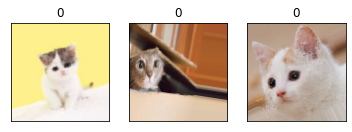

In [15]:
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))

    plt.imshow(img[i])

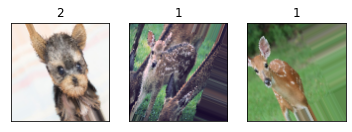

In [16]:
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    # mode='categorical' 방식으로 설정했기 때문에
    # next() 실행으로 리턴되는 정답(label)은 one-hot encoding 방식.
    # 정답을 십진수로 표시하기 위해 np.argmax() 사용

    plt.imshow(img[i])

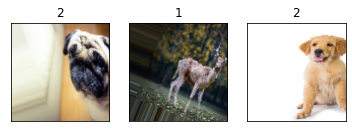

In [17]:
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))

    plt.imshow(img[i])